In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud/card_transdata.csv


# Previsão de Fraudes em Transações com Cartão de Crédito

*🔎 Este projeto analisa diferentes modelos de Machine Learning para prever fraudes em transações com cartão de crédito. Para isso, utilizamos métricas como acurácia, matriz de confusão, gráficos de desempenho e análise de erros.*

*🔹 O projeto está organizado nos seguintes tópicos:*

***1️⃣ - Análise Exploratória dos Dados
Exploração inicial do dataset para entender padrões e possíveis discrepâncias.***

***2️⃣ - Correlação e Preparação dos Dados
Análise de correlação entre variáveis e separação dos conjuntos de treino e teste.***

***3️⃣ - Treinamento e Avaliação dos Modelos
Treinamento de diferentes modelos de Machine Learning e análise dos resultados com matriz de confusão.***

***4️⃣ - Conclusões e Escolha do Melhor Modelo
Resumo dos resultados e decisão sobre o modelo mais adequado para prever fraudes.***



# Análise Exploratória dos Dados

In [2]:
# Importação do dateset das fraudes
df = pd.read_csv('/kaggle/input/credit-card-fraud/card_transdata.csv')
df.head(3) # Visualizar as 3 primeiras colunas do dataset

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


In [3]:
# Verificando a quantidade de colunas, os tipos dos dados e se tem valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [4]:
# Análisando os quartis, valores máximos, mínimos, média e possíveis outliers
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlação e Preparação dos Dados

In [5]:
# Bibliotecas gráficas
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Criando uma cópia do dataset
df_norm = df.copy()

In [7]:
df_norm.head(3)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


<Axes: >

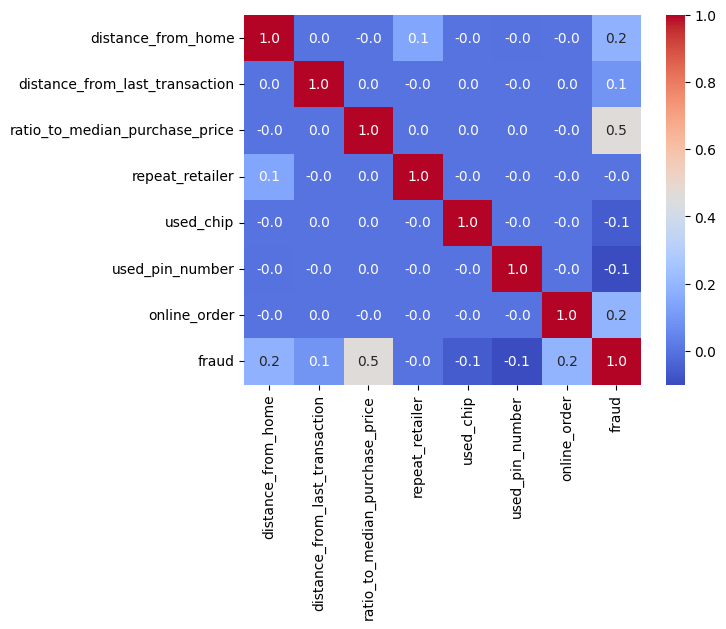

In [8]:
# Análise gráfica da correlação das colunas
corr = df_norm.corr()
sns.heatmap(corr, fmt = '.1f', cmap = 'coolwarm', annot = True)

In [9]:
# Escolha das variáveis independentes e dependente
X = df_norm.drop(['repeat_retailer','fraud'], axis = 1)
print(X.columns) # Colunas que serão utilizadas como variáveis independentes 
X = X.values
y = df_norm.iloc[:,-1].values

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'used_chip', 'used_pin_number',
       'online_order'],
      dtype='object')


# Treinamento e Avaliação dos Modelos

In [10]:
# Métricas de erros
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import time

In [11]:
# Modelos que serão utilizados
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [12]:
# Separação da amostra (30 % de test e 70 % de treino)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [13]:
# Criação das listas dos modelos
modelos_accuracy = []

modelos_nomes = ['Árvore de Decisão', 'Random Forest', 'KNN', 'Gaussian']

modelos = [DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5),
           RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5),
           KNeighborsClassifier(),
           GaussianNB()]

modelos_tempo_execucao = []

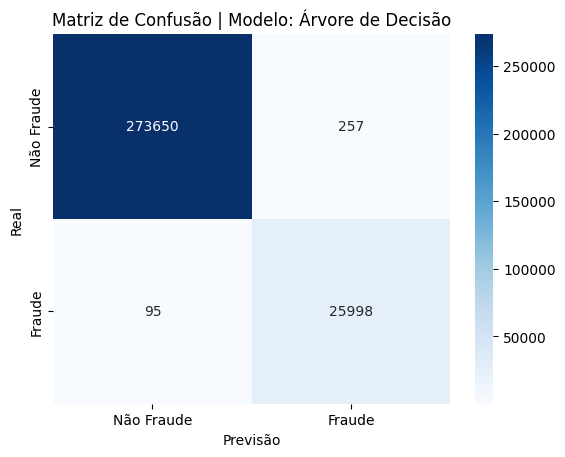

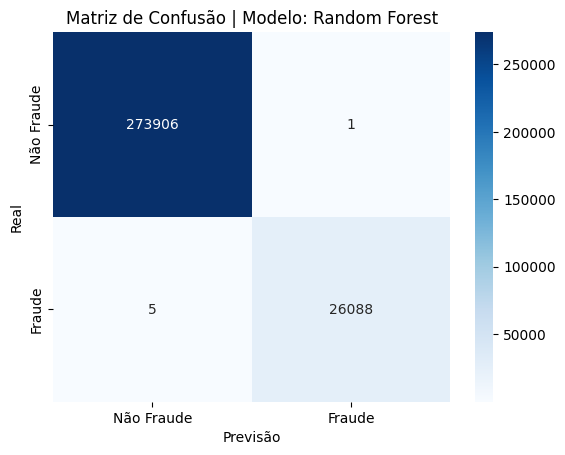

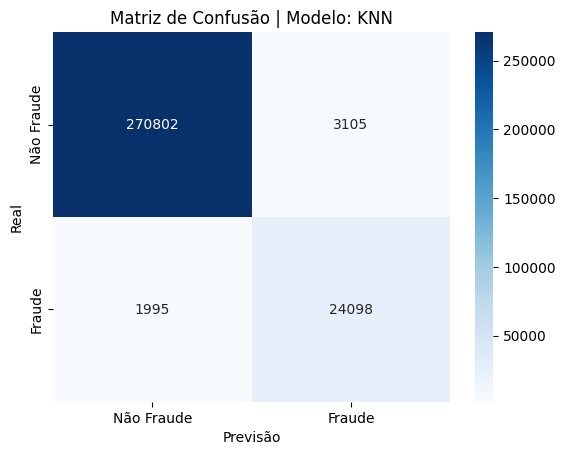

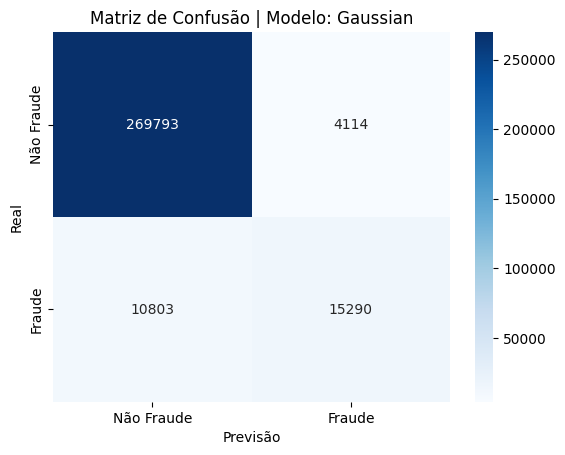

In [14]:
# Laço de repetição responsável por treinar os modelos, calcular a matriz de confusão, accuracy
# e o tempo de execução de cada um
for i in range(len(modelos)):
    start_time = time.time()
    modelos[i].fit(X_train, y_train)
    end_time = time.time()
    
    modelos_tempo_execucao.append(end_time - start_time)
    y_pred = modelos[i].predict(X_test)
    modelos_accuracy.append(accuracy_score(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, cmap = 'Blues', fmt = 'd', annot = True, xticklabels=["Não Fraude", "Fraude"], yticklabels=["Não Fraude", "Fraude"])
    plt.title(f'Matriz de Confusão | Modelo: {modelos_nomes[i]}')
    plt.xlabel('Previsão')
    plt.ylabel('Real')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


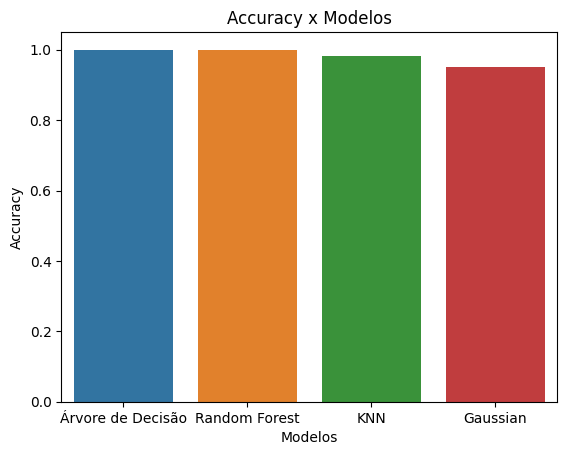

In [15]:
sns.barplot(x = modelos_nomes, y = modelos_accuracy)
plt.title('Accuracy x Modelos')
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.show()

In [16]:
# Mostrando os valores obtidos do tempo de execução e accuracy de cada modelo treinado
for i in range(len(modelos)):
    print(f'Modelo: {modelos_nomes[i]} | Accuracy: {modelos_accuracy[i]} | Tempo de Execução: {modelos_tempo_execucao[i]}')
    print('')

Modelo: Árvore de Decisão | Accuracy: 0.9988266666666666 | Tempo de Execução: 2.511746883392334

Modelo: Random Forest | Accuracy: 0.99998 | Tempo de Execução: 93.8458366394043

Modelo: KNN | Accuracy: 0.983 | Tempo de Execução: 1.5557663440704346

Modelo: Gaussian | Accuracy: 0.9502766666666667 | Tempo de Execução: 0.20984888076782227



# Conclusões e Escolha do Melhor Modelo

*Após a análise detalhada dos modelos e suas respectivas métricas, o Random Forest se destacou como o melhor modelo para prever fraudes em transações de cartão de crédito. Com uma acurácia de 0.9999866666666667, a matriz de confusão mostrou que o modelo teve 26090 acertos na previsão de fraudes e apenas 6 erros na detecção das fraudes.*

*Caso o objetivo seja priorizar um modelo mais rápido em termos de tempo de execução, o Decision Tree se apresenta como uma alternativa viável, pois possui um tempo de execução significativamente menor. No entanto, sua matriz de confusão apresenta mais erros: 25998 acertos na classificação de fraudes e 95 erros.*